# MACHINE LEARNING I
# 
# LAB ASSIGNMENT I: CLASSIFICATION

## Authors:

- **Alberto García Martín**: 

- **Jorge Peralta Fernández-Revuelta**:

- **Juan López Segura**: 202308780@alu.comillas.edu

In this lab assignment, we will analyze the FICO_Dataset.csv dataset and extract conclusions, performing several classification methods properly explained.

---

In [2]:
### Load necessary modules -------------------------------
# interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries
from sklearn.model_selection import train_test_split

---

## 1. Preparing the Dataset

First of all, we start by loading the dataset and taking a look at the first 10 rows, shape of the DataFrame and type of columns in order to understand the variables.

### STEP 1: IMPORT DATASET

In [3]:
### Load file --------------------------------------------
df2 = pd.read_csv('FICO_dataset_reduced_MOD.csv', sep = ";")
df2.head()

RiskPerformance  ExternalRiskEstimate  NetFractionRevolvingBurden  \
0              1.0                    55                          33   
1              1.0                    61                           0   
2              1.0                    67                          53   
3              1.0                    66                          72   
4              1.0                    81                          51   

   AverageMInFile  MSinceOldestTradeOpen  PercentTradesWBalance  \
0              84                  144.0                   69.0   
1              41                   58.0                    0.0   
2              24                   66.0                   86.0   
3              73                  169.0                   91.0   
4             132                  333.0                   80.0   

   PercentInstallTrades  NumSatisfactoryTrades  NumTotalTrades  \
0                    43                   20.0            23.0   
1                    67                    2.0             7.0   
2                    44                    9.0             9.0   
3                    57                   28.0            30.0   
4                    25                   12.0            12.0   

   PercentTradesNeverDelq  MSinceMostRecentInqexcl7days  
0                      83                             0  
1                     100                             0  
2                     100                             0  
3                      93                             0  
4                     100                             0

In [4]:
print("Shape of the DataFrame = ", df2.shape)

Shape of the DataFrame =  (7442, 11)


As we can see, there are 11 variables. Of those 11, 10 are independent, including:

- **ExternalRiskEstimate**: A measure of borrower's riskiness based on consolidated external data sources.

- **NetFractionRevolvingBurden**: The proportion of an individual's current credit usage compared to their maximum allowed credit.

- **AverageMInFile**: The average duration, in months, of the trades in a borrower's credit file.

- **MSinceOldestTradeOpen**: The age, in months, of a borrower's oldest credit account.

- **PercentTradesWBalance**: The percentage of ????.

- **PercentInstallTrades**: The percentage of a borrower's credit accounts that have fixed payment terms over a specified period.

- **NumSatisfactoryTrades**: Count of trades where a borrower has met obligations satisfactorily.

- **NumTotalTrades**: Number of Total Trades (total number of credit accounts).

- **MSinceMostRecentInqexcl7days**: Months since the last credit inquiry, ignoring the most recent week.

- **PercentTradesNeverDelq**: The percentage of a borrower's trades with no history of delinquency.

Therefore, the variable to be predicted is:

- **RiskPerformance**: Paid as negotiated flag (12-36 months). Class variable (0 or 1).

### STEP 2: CHECK OUT THE MISSING VALUES

In [5]:
### Info and type of variables & missing
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5245 non-null   float64
 1   ExternalRiskEstimate          7442 non-null   int64  
 2   NetFractionRevolvingBurden    7442 non-null   int64  
 3   AverageMInFile                7442 non-null   int64  
 4   MSinceOldestTradeOpen         7415 non-null   float64
 5   PercentTradesWBalance         7386 non-null   float64
 6   PercentInstallTrades          7442 non-null   int64  
 7   NumSatisfactoryTrades         7425 non-null   float64
 8   NumTotalTrades                7419 non-null   float64
 9   PercentTradesNeverDelq        7442 non-null   int64  
 10  MSinceMostRecentInqexcl7days  7442 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 639.7 KB


We can observe that there are several missing values. Appart from that, it is also necessary to change the type of our response variable, and also we could reassign the type of the *float64* ones to *int64*.

In [6]:
### Basic removal of missing values
#df = df2.interpolate(method= 'nearest', axis = 0)
df = df2.dropna(inplace=False) #Inplace for "really" elminiating the rows in the dataframe
#Check "axis" or "subset" arguments for additional options.
#Check results
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5122 non-null   float64
 1   ExternalRiskEstimate          5122 non-null   int64  
 2   NetFractionRevolvingBurden    5122 non-null   int64  
 3   AverageMInFile                5122 non-null   int64  
 4   MSinceOldestTradeOpen         5122 non-null   float64
 5   PercentTradesWBalance         5122 non-null   float64
 6   PercentInstallTrades          5122 non-null   int64  
 7   NumSatisfactoryTrades         5122 non-null   float64
 8   NumTotalTrades                5122 non-null   float64
 9   PercentTradesNeverDelq        5122 non-null   int64  
 10  MSinceMostRecentInqexcl7days  5122 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 480.2 KB


### STEP 3: ENCODE CATEGORICAL VARIABLES

In [7]:
#There are no categorical input variables

### Convert output variable to factor
df.RiskPerformance = df.RiskPerformance.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   RiskPerformance               5122 non-null   category
 1   ExternalRiskEstimate          5122 non-null   int64   
 2   NetFractionRevolvingBurden    5122 non-null   int64   
 3   AverageMInFile                5122 non-null   int64   
 4   MSinceOldestTradeOpen         5122 non-null   float64 
 5   PercentTradesWBalance         5122 non-null   float64 
 6   PercentInstallTrades          5122 non-null   int64   
 7   NumSatisfactoryTrades         5122 non-null   float64 
 8   NumTotalTrades                5122 non-null   float64 
 9   PercentTradesNeverDelq        5122 non-null   int64   
 10  MSinceMostRecentInqexcl7days  5122 non-null   int64   
dtypes: category(1), float64(4), int64(6)
memory usage: 445.3 KB


C:\Users\juanl\AppData\Local\Temp\ipykernel_18472\3737155944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.RiskPerformance = df.RiskPerformance.astype('category')


### STEP 4: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [8]:
# Data types
df.describe()

ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
count           5122.000000                 5122.000000     5122.000000   
mean              71.101913                   34.588052       77.169075   
std               12.593976                   29.112502       33.560991   
min               -9.000000                   -9.000000       -9.000000   
25%               64.000000                    8.250000       57.000000   
50%               72.000000                   29.000000       75.000000   
75%               80.000000                   56.000000       94.000000   
max               93.000000                  232.000000      322.000000   

       MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
count             5122.00000            5122.000000           5122.000000   
mean               200.73116              65.480476             34.601913   
std                 99.22485              22.773417             17.386041   
min                 -9.00000              -9.000000             -9.000000   
25%                135.25000              50.000000             22.000000   
50%                185.00000              67.000000             33.000000   
75%                260.00000              82.000000             46.000000   
max                604.00000             100.000000            100.000000   

       NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
count            5122.000000     5122.000000             5122.000000   
mean               21.138032       22.850059               91.311597   
std                11.302047       12.250118               15.225203   
min                -9.000000       -9.000000               -9.000000   
25%                13.000000       15.000000               89.000000   
50%                20.000000       22.000000               97.000000   
75%                28.000000       30.000000              100.000000   
max                78.000000      100.000000              100.000000   

       MSinceMostRecentInqexcl7days  
count                    5122.00000  
mean                        2.19387  
std                         5.00721  
min                        -9.00000  
25%                         0.00000  
50%                         0.00000  
75%                         3.00000  
max                        24.00000

As we can see, there are negative values that stand out. According to the information given, there are 3 possible scenarios:

- **-9**: No Bureau Record or No Investigation.

- **-8**: No Usable/Valid Trades or Inquiries.

- **-7**: Condition not Met (e.g. No Inquiries, No Delinquencies).

Therefore, if a **-9** appears in any row, it should be replaced. Nonetheless, if we take a look at the *.csv* file, we can see that there are around 50 rows that all of the values for the independent variables are **-9**, so we can proceed by deleting those rows.

In [9]:
df = df[(df != -9).all(axis=1)]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5072 entries, 0 to 7391
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   RiskPerformance               5072 non-null   category
 1   ExternalRiskEstimate          5072 non-null   int64   
 2   NetFractionRevolvingBurden    5072 non-null   int64   
 3   AverageMInFile                5072 non-null   int64   
 4   MSinceOldestTradeOpen         5072 non-null   float64 
 5   PercentTradesWBalance         5072 non-null   float64 
 6   PercentInstallTrades          5072 non-null   int64   
 7   NumSatisfactoryTrades         5072 non-null   float64 
 8   NumTotalTrades                5072 non-null   float64 
 9   PercentTradesNeverDelq        5072 non-null   int64   
 10  MSinceMostRecentInqexcl7days  5072 non-null   int64   
dtypes: category(1), float64(4), int64(6)
memory usage: 440.9 KB


ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
count           5072.000000                 5072.000000     5072.000000   
mean              71.891562                   35.017744       78.018533   
std                9.812423                   28.930548       32.611540   
min               33.000000                   -8.000000        4.000000   
25%               64.000000                    9.000000       57.000000   
50%               72.000000                   30.000000       75.000000   
75%               80.000000                   56.000000       95.000000   
max               93.000000                  232.000000      322.000000   

       MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
count            5072.000000            5072.000000           5072.000000   
mean              202.798699              66.214708             35.031743   
std                97.491844              21.645005             16.921140   
min                -8.000000              -8.000000              0.000000   
25%               137.000000              50.000000             22.000000   
50%               186.000000              67.000000             33.000000   
75%               261.000000              83.000000             46.000000   
max               604.000000             100.000000            100.000000   

       NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
count            5072.000000     5072.000000             5072.000000   
mean               21.435134       23.164038               92.300473   
std                10.952243       11.893031               11.571476   
min                 0.000000        1.000000                0.000000   
25%                13.000000       15.000000               89.000000   
50%                20.000000       22.000000               97.000000   
75%                28.000000       30.000000              100.000000   
max                78.000000      100.000000              100.000000   

       MSinceMostRecentInqexcl7days  
count                   5072.000000  
mean                       2.304219  
std                        4.906292  
min                       -8.000000  
25%                        0.000000  
50%                        0.000000  
75%                        3.000000  
max                       24.000000

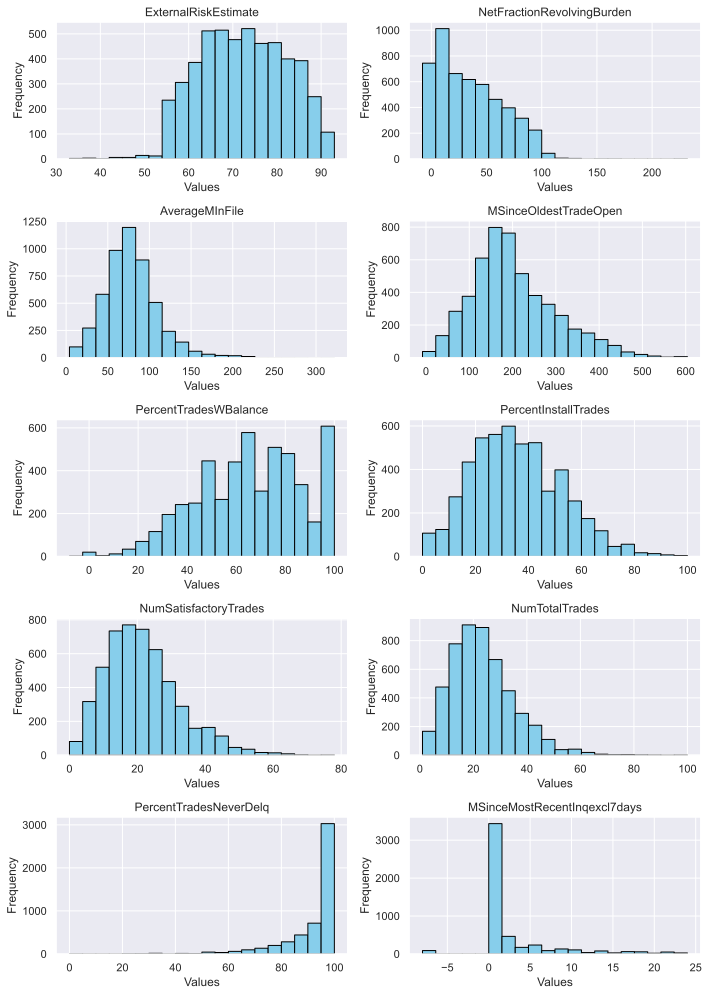

In [10]:
Dependent_vars = df.columns[df.dtypes != 'category']

# Definition of the rows and columns for the plot
num_rows = len(Dependent_vars) // 2  
num_cols = 2

# Creation of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 14))

# Loop in charge of representing histograms
for i, var in enumerate(Dependent_vars):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].hist(df[var], bins=20, color='skyblue', edgecolor='black') #Number of bins could be changed
    axs[row, col].set_title(var)
    axs[row, col].set_xlabel('Values')
    axs[row, col].set_ylabel('Frequency')

# Adjustment of design
plt.tight_layout()

# Graphic display
plt.show()

In most of the columns, we cannot see any clear outliers or strange observations. Nevertheless, we can observe some negative values and peculiar raises in the frequencies (for example, in `ExternalRiskEstimate`). Therefore, we proceed representing several boxplots and scatterplots of the variables.

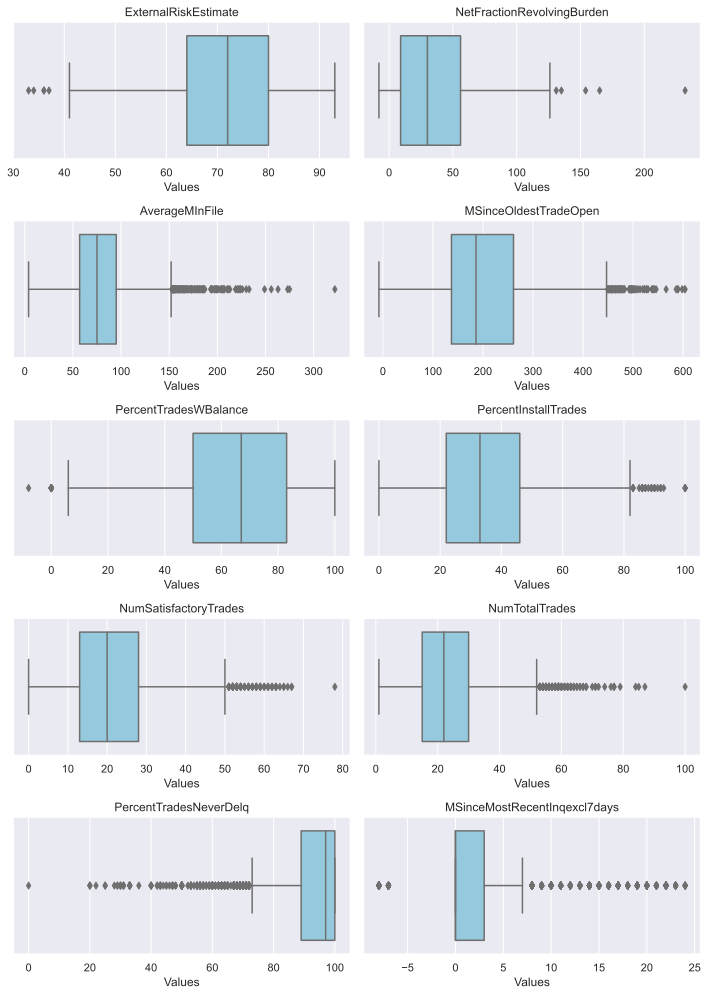

In [11]:
# Creation of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 14))

# Loop in charge of representing histograms
for i, var in enumerate(Dependent_vars):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[var], ax=axs[row, col], color='skyblue')
    axs[row, col].set_title(var)
    axs[row, col].set_xlabel('Values')

# Adjustment of design
plt.tight_layout()

# Graphic display
plt.show()

Me queda: 
Otro gráfico para outliers si hay.
Comentar un poco los gráficos de arriba. 
Relación variables entre sí (pairplot).

### STEP 5: EXPLORATORY ANALYSIS

First, we are going to represent a brief study between the dependent variable `RiskPerformance` and the rest of all. We have several options, such as density curves, box plots, etc. Nevertheless, we are going to plot a group of violin plots, stip plots and histogram subplots based on the response variable (box plots and density curves contain the same information as the previous ones).

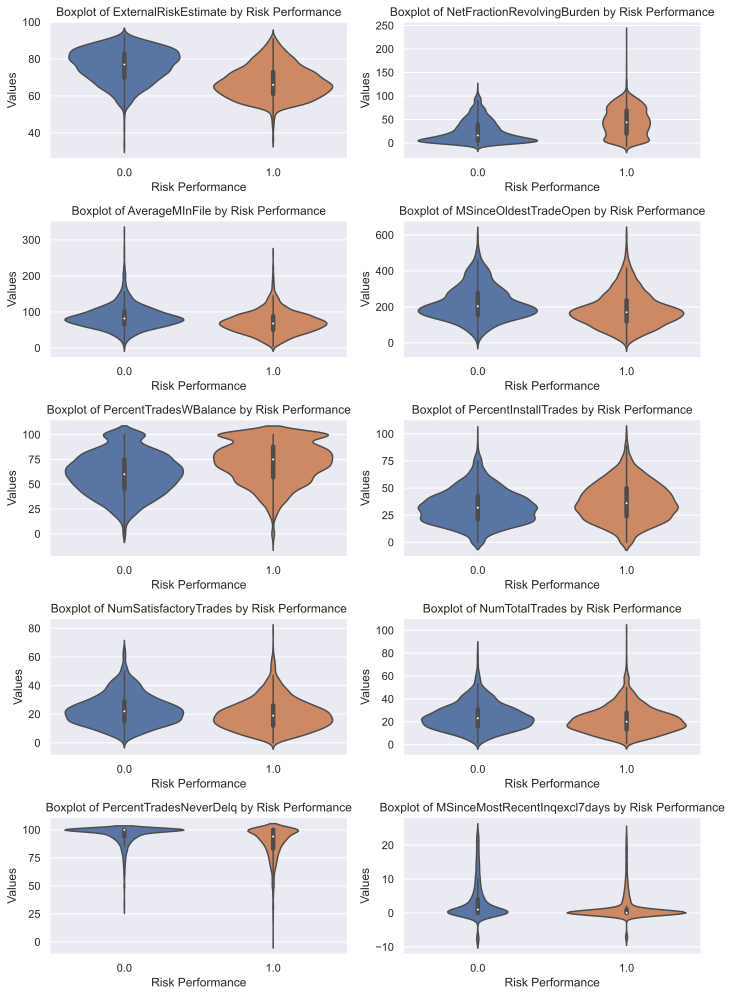

In [19]:
# Creation of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 14))

# Loop in charge of representing histograms
for i, var in enumerate(Dependent_vars):
    row = i // num_cols
    col = i % num_cols
    sns.violinplot(x='RiskPerformance', y=var, data=df, ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {var} by Risk Performance')
    axs[row, col].set_xlabel('Risk Performance')
    axs[row, col].set_ylabel('Values')

# Adjustment of design
plt.tight_layout()

# Graphic display
plt.show()

In [41]:
# Creation of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 14))

# Loop in charge of representing histograms
for i, var in enumerate(Dependent_vars):
    row = i // num_cols
    col = i % num_cols
    sns.stripplot(x='RiskPerformance', y=var, data=df, ax=axs[row, col], jitter=True)
    axs[row, col].set_title(f'Boxplot of {var} by Risk Performance')
    axs[row, col].set_xlabel('Risk Performance')
    axs[row, col].set_ylabel('Values')

# Adjustment of design
plt.tight_layout()

# Graphic display
plt.show()

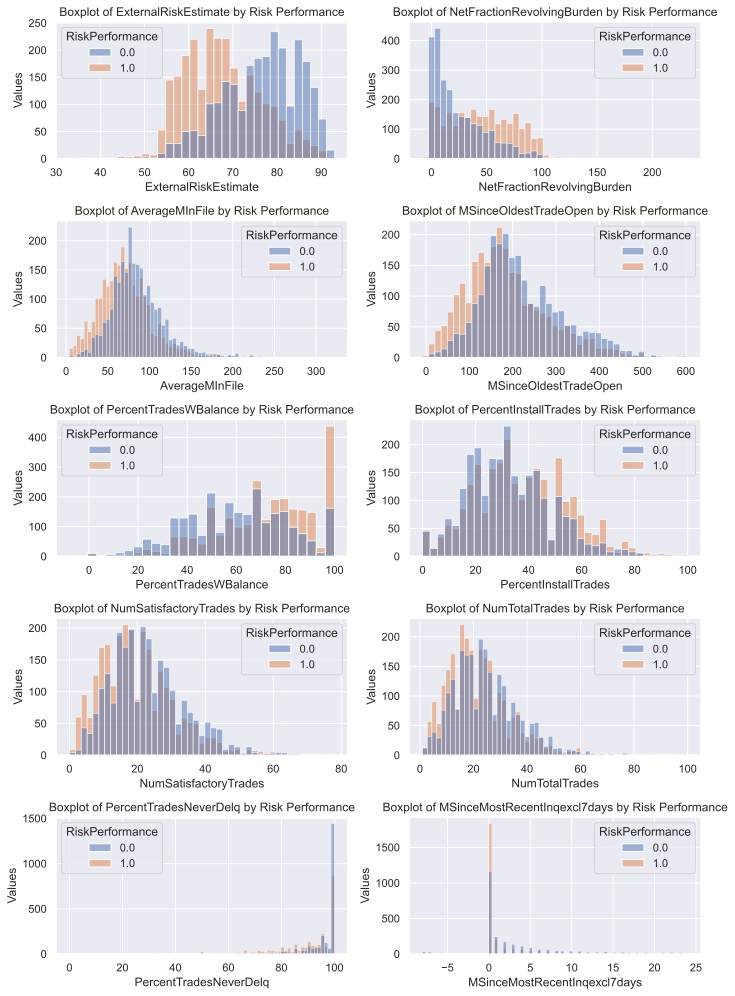

In [36]:
# Creation of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 14))

# Loop in charge of representing histograms
for i, var in enumerate(Dependent_vars):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(x=var, hue='RiskPerformance', data=df, ax=axs[row, col], kde=False)
    axs[row, col].set_title(f'Boxplot of {var} by Risk Performance')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Values')

# Adjustment of design
plt.tight_layout()

# Graphic display
plt.show()

The next task will be to study the possible relationship among independent variables, using a correlations plot and a pairplot, if possible.

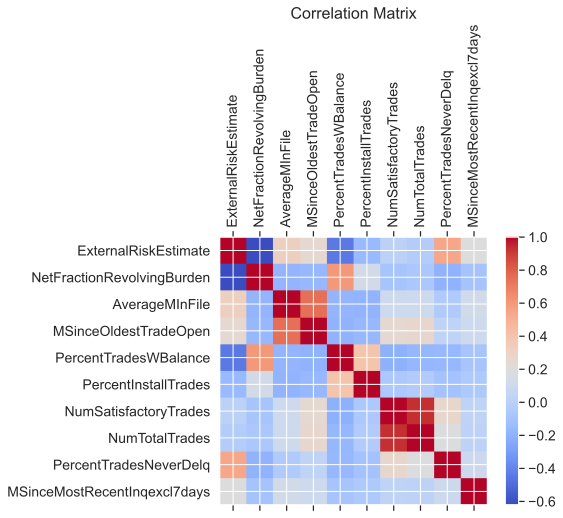

In [40]:
### Exploratory analysis -------------------------------------------------------------------------------------
#correlation plot of numeric variables
f = plt.figure()
plt.matshow(df.select_dtypes(include=['int64','float64']).corr(), fignum=f.number, cmap='coolwarm')
plt.xticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
# Scatterplot all vs all
# sns.pairplot(df, hue = 'RiskPerformance', height=12)
# plt.show()

We can appreciate that nearly all of them has little or no relationship with others. However, there are a few exceptions such as:

- **NumSatisfactoryTrades VS NumTotalTrades**: It seems pretty obvious because more trades will cause more satisfactory trades.

- **AverageMInFile VS MSinceOldestTradeOpen**: Similar to the previous one. More months in file is related with the months of your oldest trade.

- **ExternalRiskEstimate VS NetFractionRevolvingBurden**: It will be reasonable to have a lower `ExternalRiskEstimate` with a higher `NetFractionRevolvingBurden`, because it is easier for that specific sector to have paying problems.

### STEP 6: CHECK OUT FOR CLASS IMBALANCES

In [43]:
# Class count
df['RiskPerformance'].value_counts()

RiskPerformance
1.0    2582
0.0    2490
Name: count, dtype: int64

As we can see, our dependent variable is nearly perfectly balanced. So is that, we can move onto the next segment.

### STEP 7: SPLIT THE DATA INTO TRAINING AND TEST SETS

We apply the methods learnt in class to split the data into training and test sets, preserving the distribution of the response variable and doing copies of the subsets to store them.

In [44]:
# Define input and output matrices
INPUTS = df.drop(columns=['RiskPerformance']).columns.tolist()
OUTPUT = 'RiskPerformance'
X = df[INPUTS]
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  #percentage of test data
                                                    random_state=0, #seed for replication
                                                    stratify = y)   #Preserves distribution of y

In [45]:
X_train.head()

ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
6522                    83                           1              83   
7261                    86                           5              89   
3868                    61                          49              64   
5922                    75                          36              45   
2571                    75                          15              31   

      MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
6522                  158.0                   63.0                    71   
7261                  181.0                   50.0                     9   
3868                  186.0                   83.0                    45   
5922                  169.0                   53.0                    21   
2571                  212.0                   83.0                    42   

      NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
6522                   27.0            31.0                     100   
7261                   11.0            11.0                     100   
3868                   24.0            29.0                      79   
5922                   27.0            29.0                     100   
2571                   12.0            23.0                      92   

      MSinceMostRecentInqexcl7days  
6522                             0  
7261                             1  
3868                             0  
5922                            15  
2571                             2

In [46]:
## Create dataset to store model predictions
dfTR_eval = X_train.copy()
dfTR_eval['RiskPerformance'] = y_train # We will call Y as output variable for simplicity
dfTS_eval = X_test.copy()
dfTS_eval['RiskPerformance'] = y_test # We will call Y as output variable for simplicity